---
title: "Bringing it all together - Network analysis"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-11"
categories: [python, datacamp, network analysis, machine learning, NetworkX]
image: "bringingAllTogether.png"

---

# Bringing it all together - Network analysis

We'll consolidate everything you've learned through an in-depth case study of GitHub collaborator network data. This is a great example of real-world social network data, and we have newly acquired skills will be fully tested. By the end of this chapter, we'll have developed our very own recommendation system to connect GitHub users who should collaborate together.

This **Bringing it all together** is part of [Datacamp course: Introduction to Network Analysis in Python]

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Network Analysis in Python]: (https://app.datacamp.com/learn/courses/introduction-to-network-analysis-in-python)

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
G= pd.read_pickle('dataset/github_users.p')

![DataCaseStudy](DataCaseStudy.png)

## Characterizing the network (I)

To start out, let’s do some basic characterization of the network, by looking at the number of nodes and number of edges in a network.

In [3]:
G.nodes(data=True)

NodeDataView({'u1': {'bipartite': 'users'}, 'u2': {'bipartite': 'users'}, 'u3': {'bipartite': 'users'}, 'u4': {'bipartite': 'users'}, 'u5': {'bipartite': 'users'}, 'u6': {'bipartite': 'users'}, 'u7': {'bipartite': 'users'}, 'u8': {'bipartite': 'users'}, 'u9': {'bipartite': 'users'}, 'u10': {'bipartite': 'users'}, 'u11': {'bipartite': 'users'}, 'u12': {'bipartite': 'users'}, 'u13': {'bipartite': 'users'}, 'u14': {'bipartite': 'users'}, 'u15': {'bipartite': 'users'}, 'u16': {'bipartite': 'users'}, 'u17': {'bipartite': 'users'}, 'u18': {'bipartite': 'users'}, 'u19': {'bipartite': 'users'}, 'u20': {'bipartite': 'users'}, 'u21': {'bipartite': 'users'}, 'u22': {'bipartite': 'users'}, 'u23': {'bipartite': 'users'}, 'u24': {'bipartite': 'users'}, 'u25': {'bipartite': 'users'}, 'u26': {'bipartite': 'users'}, 'u27': {'bipartite': 'users'}, 'u28': {'bipartite': 'users'}, 'u29': {'bipartite': 'users'}, 'u30': {'bipartite': 'users'}, 'u31': {'bipartite': 'users'}, 'u32': {'bipartite': 'users'}, 'u3

In [4]:
G.edges(data=True)

EdgeDataView([('u1', 'u3124', {}), ('u1', 'u1814', {}), ('u1', 'u5888', {}), ('u1', 'u9483', {}), ('u1', 'u1527', {}), ('u1', 'u9271', {}), ('u1', 'u8196', {}), ('u1', 'u2653', {}), ('u1', 'u4534', {}), ('u1', 'u2253', {}), ('u1', 'u127', {}), ('u1', 'u3071', {}), ('u1', 'u3166', {}), ('u2', 'u9346', {}), ('u3', 'u2688', {}), ('u3', 'u5814', {}), ('u3', 'u1511', {}), ('u3', 'u719', {}), ('u3', 'u3681', {}), ('u3', 'u7940', {}), ('u3', 'u958', {}), ('u3', 'u8059', {}), ('u3', 'u1764', {}), ('u3', 'u5496', {}), ('u3', 'u3426', {}), ('u3', 'u204', {}), ('u3', 'u6701', {}), ('u3', 'u3117', {}), ('u3', 'u409', {}), ('u3', 'u4390', {}), ('u3', 'u1879', {}), ('u3', 'u6118', {}), ('u3', 'u7195', {}), ('u3', 'u6', {}), ('u3', 'u2823', {}), ('u3', 'u1608', {}), ('u3', 'u8480', {}), ('u3', 'u2593', {}), ('u3', 'u5207', {}), ('u3', 'u1937', {}), ('u3', 'u3467', {}), ('u3', 'u1054', {}), ('u3', 'u3610', {}), ('u3', 'u307', {}), ('u3', 'u7765', {}), ('u3', 'u1679', {}), ('u3', 'u8946', {}), ('u3', '

In [5]:
len(G.nodes())

56519

In [6]:
len(G.edges())

72900

## Characterizing the network (II)

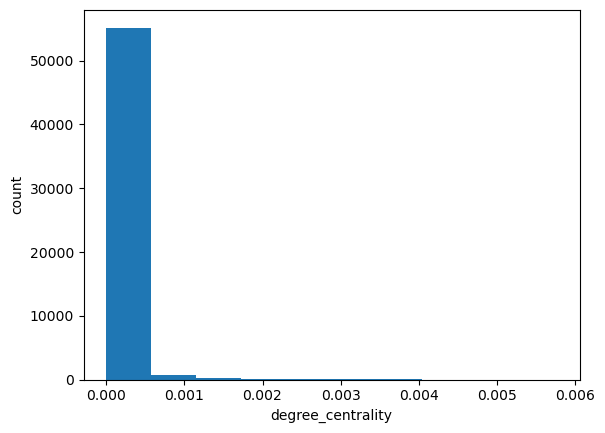

In [7]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.xlabel('degree_centrality')
plt.ylabel('count')
plt.show()

## Characterizing the network (III)

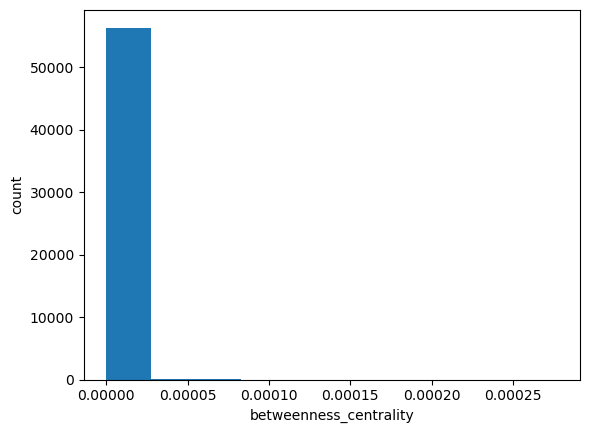

In [8]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.xlabel('betweenness_centrality')
plt.ylabel('count')
plt.show()

## Case study part II: Visualization



### MatrixPlot

Let’s now practice making some visualizations. The first one will be the MatrixPlot. In a MatrixPlot, the matrix is the representation of the edges.

In [9]:
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

/Users/kakamana/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


AttributeError: module networkx has no attribute connected_component_subgraphs

### ArcPlot

In [ ]:
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

### CircosPlot

In [10]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(graph=G, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

AttributeError: 'Graph' object has no attribute 'node'

## Case study part III: Cliques

In [ ]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

In [ ]:
print(len(list(cliques)))

In [ ]:
list(cliques)

## Finding cliques (II)

Let’s continue by finding a particular maximal clique, and then plotting that cliqu

In [ ]:

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

## Case study part IV: Final tasks

In [ ]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

## Characterizing editing communities

You’re now going to combine what you’ve learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

In [ ]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(graph=G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

## Recommending co-editors who have yet to edit together

In [ ]:
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)